In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import skfuzzy as fuzz
import seaborn as sns

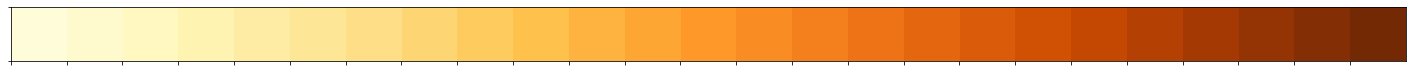

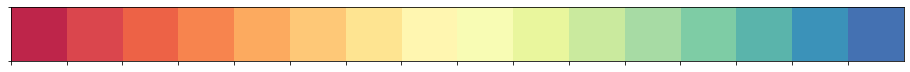

In [24]:
sns.palplot(sns.color_palette("YlOrBr",n_colors=25).as_hex())
sns.palplot(sns.color_palette("Spectral",n_colors=16).as_hex())

# Preprocess:
read csv and normalization

In [99]:
data = pd.read_csv("e-shop data and description/e-shop clothing 2008.csv", delimiter=";")
data = data.drop(['year', 'page 2 (clothing model)'], axis=1)
scaler = StandardScaler()
data = pd.DataFrame(data=scaler.fit_transform(data), columns=[data.columns])

In [6]:
path = "e-shop data and description/e-shop clothing 2008.csv"
path.split(sep='/')[-1][:-4]
data = pd.read_csv(path, delimiter=";")
data = data.drop(['year', 'page 2 (clothing model)'], axis=1)
data

,month,day,order,country,session ID,page 1 (main category),colour,location,model photography,price,price 2,page
0,4,1,1,29,1,1,1,5,1,28,2,1
1,4,1,2,29,1,1,1,6,1,33,2,1
2,4,1,3,29,1,2,10,2,1,52,1,1
3,4,1,4,29,1,2,6,6,2,38,2,1
4,4,1,5,29,1,2,4,3,2,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165469,8,13,1,29,24024,2,2,4,1,67,1,1
165470,8,13,1,9,24025,1,3,4,1,62,1,1
165471,8,13,1,34,24026,1,3,1,1,43,2,1
165472,8,13,2,34,24026,3,12,1,1,43,1,1


# Dimension Reduction:

In [9]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data)
print(pca.explained_variance_ratio_)
print('total variance:', str(int((sum(pca.explained_variance_ratio_) * 100))) + '%')
pca_data = pd.DataFrame(data=principal_components, columns = ['dim 1', 'dim 2'])

[9.99990033e-01 3.79335085e-06]
total variance: 99%


# Clustering:

### k means

In [97]:
kmeans_n_clusters = 3
kmeans = KMeans(n_clusters=km_n_clusters, algorithm='full')
kmeans_labels = kmeans.fit_predict(data)

### gmm

In [ ]:
gmm_n_clusters = 6
gmm = GaussianMixture(n_components=gmm_n_clusters, covariance_type='full', init_params='kmeans'
                          , warm_start=False, n_init=5, random_state=100, verbose=2)
gmm.fit(data)
gmm_labels = gmm.predict(data)

### fuzzy c means

In [101]:
fuzzy_n_clusters = 6
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data.T.values, fuzzy_n_clusters, 2, error=0.005, maxiter=1000)
fuzzy_labels = np.argmax(u, axis=0)

### Hierarchical - agglomerative

In [ ]:
hierarchical_labels = {}
hierarchical_points = 100000
hierarchical_n_clusters = 6
for linkage in ('ward', 'average', 'complete', 'single'):
    hierarchical = AgglomerativeClustering(n_clusters=hierarchical_n_clusters, linkage=linkage)
    hierarchical.fit(data.sample(n=hierarchical_points, random_state=100))
    hierarchical_labels[linkage] = hierarchical.labels_
    print('done with ' + linkage + 'linkage')

### plot clusters:

In [85]:
%matplotlib qt5

In [82]:
def cluster_color(label):
    colors = ['b', 'g', 'r', 'c', 'm', '#fdff03', '#055803', '#a6fc00', '#9d70d1', '#ff703b', '#3a70d8', '#ff70b5']
    return colors[label % len(colors)]

In [83]:
def plot_clusters(data, labels, n_clusters, lfs=10, tfs=8):
    for label in range(n_clusters):
        plt.scatter(data.values[labels==label, 0], data.values[labels==label, 1], s=40, c=cluster_color(label))
    clusters_ax = plt.gca()
    clusters_ax.set_xlabel('dim1', fontsize=lfs)
    clusters_ax.set_ylabel('dim2', fontsize=lfs)
    plt.show()

In [103]:
plot_clusters(pca_data, kmeans_labels, kmeans_n_clusters)

In [95]:
plot_clusters(pca_data, fuzzy_labels, fuzzy_n_clusters)

In [115]:
plot_clusters(pca_data.sample(n=hierarchical_points, random_state=100), hierarchical_labels['ward'], hierarchical_n_clusters)